In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Read the dataset
df=pd.read_csv('/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv')
#display the first 5 rows
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


Here’s a brief overview of some key features:

uid: A unique identifier for each data point, typically an object type.

originh and responh: Hostnames or IP addresses for the origin and responder, respectively.

originp and responp: Port numbers for the origin and responder.

flow_duration: The duration of the network flow.

fwd_pkts_tot and bwd_pkts_tot: Total forward and backward packets.

fwd_data_pkts_tot and bwd_data_pkts_tot: Total forward and backward data packets.

fwd_pkts_per_sec, bwd_pkts_per_sec, flow_pkts_per_sec: Packet rates in different directions.

down_up_ratio: The ratio of download to upload traffic.

fwd_header_size_tot, bwd_header_size_tot: Total size of the header in forward and backward packets.

flow_FIN_flag_count, flow_SYN_flag_count, etc.: Counts of various TCP flags in the flow.
Packet Payload Statistics:

flow_pkts_payload.min, flow_pkts_payload.max, flow_pkts_payload.tot, flow_pkts_payload.avg, and flow_pkts_payload.std represent various statistics related to the payload size of network packets.

Inter-Arrival Time (IAT) Statistics:
fwd_iat.min, fwd_iat.max, fwd_iat.tot, fwd_iat.avg, and fwd_iat.std refer to statistics related to the time intervals between consecutive forward packets.

Similarly, bwd_iat.min, bwd_iat.max, bwd_iat.tot, bwd_iat.avg, and bwd_iat.std pertain to backward (reverse) packet inter-arrival times.
Flow Inter-Arrival Time Statistics:

flow_iat.min, flow_iat.max, flow_iat.tot, flow_iat.avg, and flow_iat.std describe the inter-arrival times between consecutive network flows

payload_bytes_per_second: The rate of payload bytes transmitted per second.

fwd_subflow_pkts and bwd_subflow_pkts: Counts of subflows in the forward and backward directions.

fwd_subflow_bytes and bwd_subflow_bytes: Total bytes in subflows.

fwd_bulk_bytes, bwd_bulk_bytes, fwd_bulk_packets, and bwd_bulk_packets: Bulk transfer-related features.

fwd_bulk_rate and bwd_bulk_rate: Rates of bulk transfer.

active.min, active.max, active.tot, active.avg, and active.std: Statistics related to active time intervals.

Idle Time Statistics:
idle.min, idle.max, idle.tot, idle.avg, and idle.std represent various statistics related to idle time.

Window Sizes:
fwd_init_window_size, bwd_init_window_size, and fwd_last_window_size are related to window sizes in network communication.

Traffic Category:
The traffic_category feature likely categorizes network flows into different classes (e.g., normal, suspicious, malicious).


In [ ]:
#Checking the datatypes
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
uid                     object
originh                 object
originp                  int64
                         ...  
fwd_init_window_size     int64
bwd_init_window_size     int64
fwd_last_window_size     int64
traffic_category        object
Label                    int64
Length: 88, dtype: object

This output shows the data types for each column in a Pandas DataFrame (df). It tells you what kind of information is stored in each column, such as integers (int64), objects (text), etc. This information is important for understanding your data and performing appropriate operations on it.

In [ ]:
#Checking the count of datatypes
df.dtypes.value_counts()

float64    56
int64      28
object      4
Name: count, dtype: int64

This code counts how many times each data type appears in your DataFrame. It shows you have 56 columns with float64 (numbers with decimals), 28 columns with int64 (whole numbers), and 4 columns with object (text) data types.

In [ ]:
#Calculating the shape of dataset
df.shape

(555278, 88)

This dataset has 555278 rows and 88 columns

In [ ]:
#calculating the null values
df.isna().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

This code helps identify missing values (nulls) in your data. It shows a count of missing values for each column. In this case, it seems there are no missing values as all counts are 0.

In [ ]:
#Displaying information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

This is a perfect dataset which has no null values

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,137369.392132,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095725,99946.804651,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,52201.000000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,121610.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,211889.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,350709.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


this dataset contains network-related metrics, including flow duration, packet rates, and window sizes.

Mean (Average) Values:
Flow Duration: Approximately 38,673 milliseconds,
Forward Packets per Second: Around 9.31 packets per second,
Idle Time (Average): Roughly 4,546 milliseconds.

Standard Deviation (Std): Varies across different columns.

Percentiles:
25th Percentile (Q1): For example, the 25th percentile of flow duration is 53 milliseconds.

50th Percentile (Median): Also known as the median, it represents the middle value in the dataset. For instance, the median flow duration is 443 milliseconds.

75th Percentile (Q3): The 75th percentile of forward packets per second is approximately 0.35 packets per second.

Minimum and Maximum Values:
Minimum Flow Duration: 21 milliseconds.
Maximum Flow Duration: 65,535 milliseconds (or 65.5 seconds).


In [ ]:
# Sample distribution by traffic category -> An unknown symbol was found in label names
df.groupby(['traffic_category']).size()

traffic_category
Background             170151
Benign                 347431
Bruteforce               5884
Bruteforce-XML           5145
Probing                 23388
XMRIGCC CryptoMiner      3279
dtype: int64

This output shows the count of instances for different traffic categories. It also highlights an important labeling detail: Background and Benign traffic are labeled as 1, indicating "mild or no attacks," while other categories presumably represent different types of attacks. This information is crucial for understanding how the data is classified and interpreting the results of any analysis or models built using this data.

<Axes: xlabel='traffic_category'>

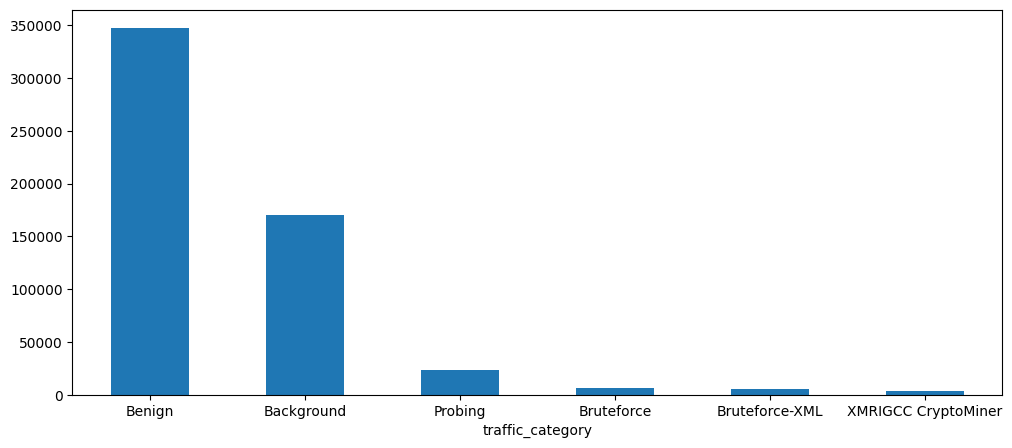

In [ ]:
# Bar graph for sample distribution by class

df['traffic_category'].value_counts().plot(kind='bar', figsize=(12,5), rot=0)

This bar chart shows the distribution of different types of network traffic. "Benign" and "Background" traffic are the most common, while categories like "Probing" and "Bruteforce" are less frequent. This suggests the data mostly contains normal network activity with a smaller portion of potentially suspicious behavior.

In [ ]:
df['Label'].value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

This code counts how many times each unique value appears in the column named "Label". It looks like there are two unique values (0 and 1) with their respective counts displayed.

<Axes: ylabel='count'>

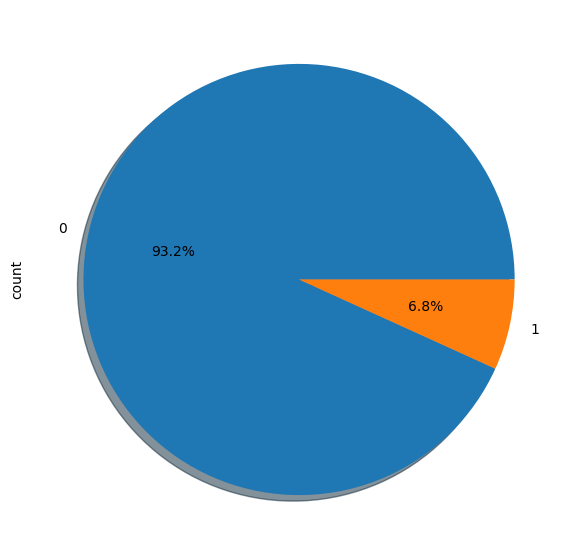

In [ ]:
#Creating pie diagram for label
fig = plt.figure(figsize=(10, 7))
df['Label'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=True)

This pie chart effectively demonstrates a common challenge in cybersecurity datasets: class imbalance. Here, the vast majority of data (93.2%) represents "normal" or "secure" instances, while only a small fraction (6.8%) represents actual cyberattacks. This imbalance can pose difficulties for machine learning models, as they may become biased towards the majority class and struggle to accurately detect the infrequent but crucial attack instances. Addressing class imbalance often involves techniques such as oversampling the minority class, undersampling the majority class, or using specialized algorithms designed for imbalanced data.

In [ ]:
# drop the rows with missing values from the DataFrame
df.dropna(inplace=True)

Drop the unwanted columns 'Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', and 'responh' from DataFrame

In [ ]:
df.drop(['Unnamed: 0.1','Unnamed: 0','uid','originh','responh'],axis=1,inplace=True)

In [ ]:
df.dtypes.value_counts()

float64    56
int64      26
object      1
Name: count, dtype: int64

**Label Encoding** : change categorical data into numerical data

In this dataset we have only one remaining object datatype ,that is traffic category

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['traffic_category']=lab.fit_transform(df['traffic_category'])


**Correlation matrix**

correlation matrix is useful for understanding how variables relate to each other. It help identify strong correlations, which can guide feature selection

In [ ]:
# finding the correlation matrix
correlation_matrix = df.corr()
#Displaying the first five rows of correlation matrix
correlation_matrix.head()


,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
originp,1.000000,0.141851,-0.030123,-0.000783,0.000897,0.025853,0.000751,0.069845,0.082466,0.077703,...,-0.111991,-0.094099,-0.030970,-0.109458,-0.012141,0.062872,-0.003073,0.083759,0.029278,-0.041678
responp,0.141851,1.000000,-0.019467,-0.012736,-0.013223,-0.037254,-0.011707,0.710889,0.784549,0.764111,...,-0.050093,-0.062031,-0.018280,-0.058022,-0.039585,0.302990,-0.260213,0.743245,-0.191922,-0.097490
flow_duration,-0.030123,-0.019467,1.000000,0.215821,0.212125,0.109239,0.206925,-0.031459,-0.033607,-0.033271,...,0.232097,0.329416,0.960199,0.286366,0.226614,0.046278,0.063106,-0.026556,-0.022893,-0.014581
fwd_pkts_tot,-0.000783,-0.012736,0.215821,1.000000,0.997819,0.198898,0.998321,-0.012408,-0.013273,-0.013131,...,0.013825,0.035310,0.043611,0.021092,0.032393,0.034037,0.046126,-0.012218,0.012886,0.013403
bwd_pkts_tot,0.000897,-0.013223,0.212125,0.997819,1.000000,0.207424,0.999463,-0.012779,-0.013602,-0.013491,...,0.014325,0.038409,0.040677,0.022598,0.036657,0.035780,0.049251,-0.012481,0.015261,0.015078


**Plotting the heatmap**

Heatmap will visually represent the correlations between different variables in your dataset. Warmer colors indicate positive correlations, while cooler colors
 indicate negative correlations.

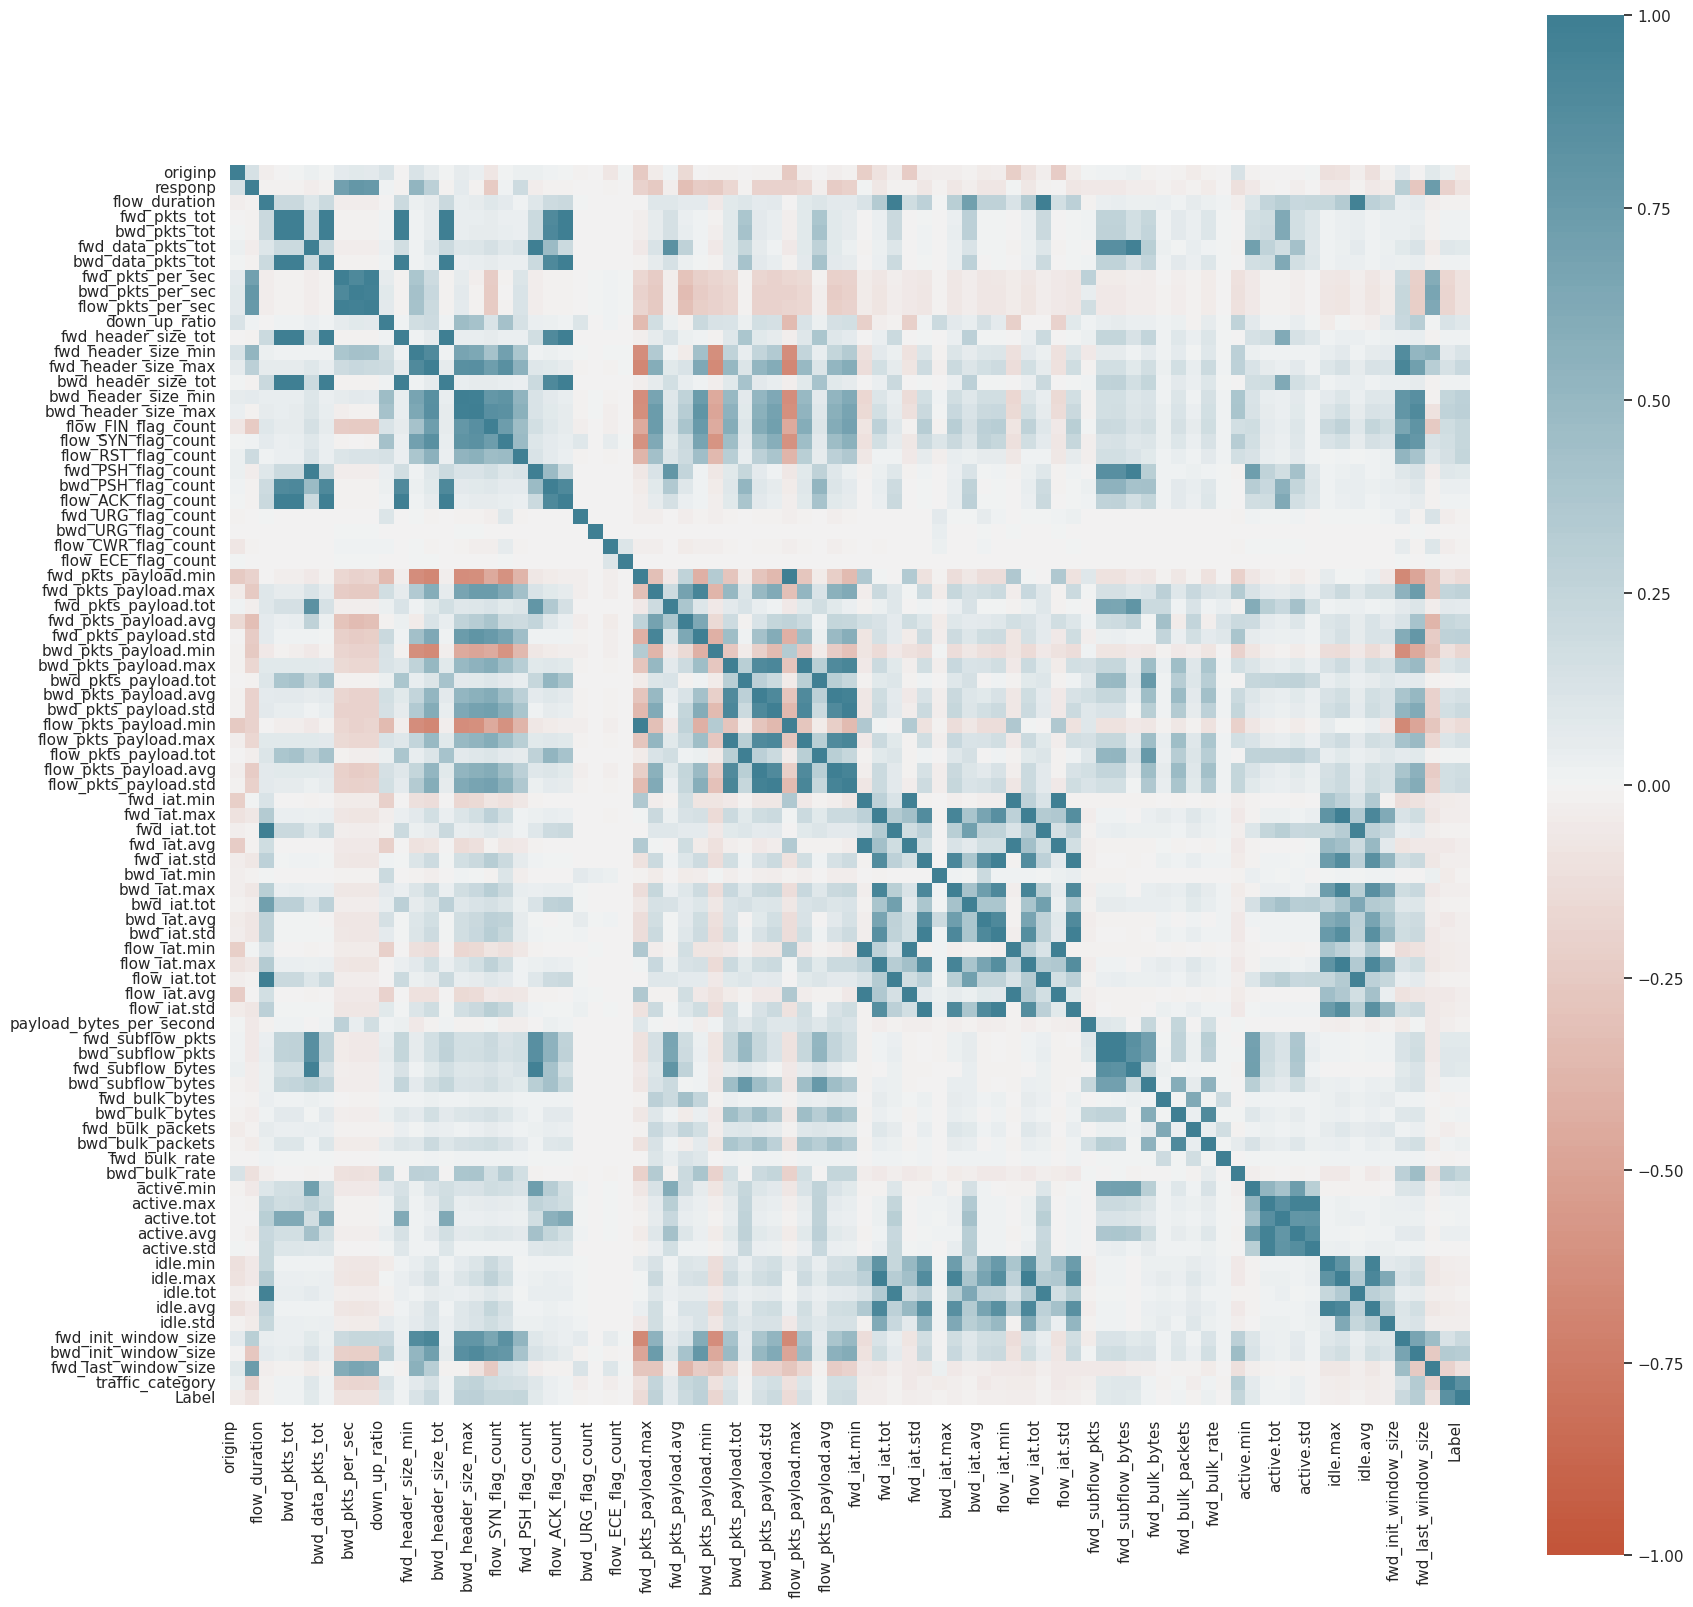

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

**Feature Engineering**





In [ ]:
sorted_corr_matrix_class= correlation_matrix.abs().sort_values(by='Label',ascending=False)

# Get the top 25 correlated features
final_features= sorted_corr_matrix_class[1:26]

print("Top 25 features with the highest absolute correlation with label: \n")
print(final_features.index.tolist())

Top 25 features with the highest absolute correlation with label: 

['traffic_category', 'bwd_init_window_size', 'bwd_header_size_max', 'fwd_pkts_payload.std', 'bwd_header_size_min', 'fwd_pkts_payload.max', 'bwd_bulk_rate', 'flow_RST_flag_count', 'flow_SYN_flag_count', 'flow_FIN_flag_count', 'fwd_header_size_max', 'fwd_init_window_size', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.std', 'flow_pkts_payload.avg', 'bwd_pkts_payload.min', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.max', 'flow_pkts_payload.max', 'fwd_pkts_payload.min', 'flow_pkts_payload.min', 'fwd_header_size_min', 'fwd_last_window_size', 'bwd_pkts_per_sec']


We extracted top 25 features with highest correlation with label computes  and stores them in the final_features DataFrame

In [ ]:
features=sorted_corr_matrix_class.index[1:21]
# Create a DataFrame with these selected features and a copy of the 'Label' column
data_prediction = df[features].copy()
data_prediction['Label'] = df['Label']

In [ ]:
#displaying the first 5 rows of data prediction
data_prediction.head()

,traffic_category,bwd_init_window_size,bwd_header_size_max,fwd_pkts_payload.std,bwd_header_size_min,fwd_pkts_payload.max,bwd_bulk_rate,flow_RST_flag_count,flow_SYN_flag_count,flow_FIN_flag_count,...,fwd_init_window_size,fwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.std,flow_pkts_payload.avg,bwd_pkts_payload.min,bwd_pkts_payload.avg,bwd_pkts_payload.max,flow_pkts_payload.max,Label
0,3,65160,44,220.736581,32,742.0,0.0,2,2,2,...,29200,121.733333,552.239840,424.859275,236.241379,0.0,358.928571,1448.0,1448.0,1
1,3,65160,44,221.339257,32,745.0,0.0,2,2,2,...,29200,121.933333,552.239840,424.987166,236.344828,0.0,358.928571,1448.0,1448.0,1
2,3,65160,44,226.803444,32,744.0,0.0,2,2,2,...,29200,130.571429,817.479013,592.570284,253.814815,0.0,386.538462,2896.0,2896.0,1
3,3,65160,44,226.803444,32,744.0,0.0,2,2,2,...,29200,130.571429,817.479013,592.570284,253.814815,0.0,386.538462,2896.0,2896.0,1
4,3,65160,44,226.803444,32,744.0,0.0,2,2,2,...,29200,130.571429,792.173394,583.468215,244.750000,0.0,358.928571,2896.0,2896.0,1


Splitting features and target from dataset

In [ ]:
x = data_prediction.drop('Label', axis=1).values
y = df['Label'].values

x.shape
y.shape

(555278, 20)

(555278,)

In [ ]:
#Training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

Scaling dataset using Robust Scaler which is good technique to scale when there are outliers. It basically uses the inter quartile range (IQR) when scaling and removes median.

In [ ]:
#Normalization
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

RobustScaler()

**MODEL TRAINING**

**RANDOM FOREST ALGORITHM**

Random Forest Classification with default values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=5, criterion='gini')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('confusion matrix for optimised random forest classification',confusion_matrix(y_test,y_pred))
print('accuracy score for optimised random forest classification',accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=0)

confusion matrix for optimised random forest classification [[103601      0]
 [     0   7455]]
accuracy score for optimised random forest classification 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103601
           1       1.00      1.00      1.00      7455

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



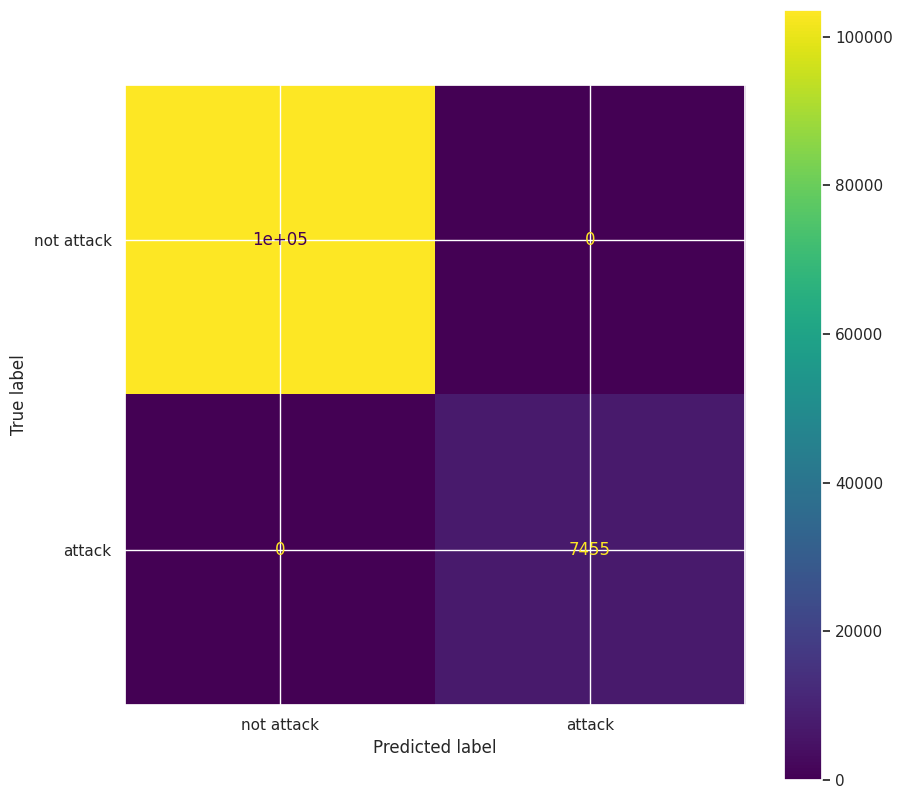

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred)
# Assuming you have already calculated the confusion matrix 'mat' and defined the labels
label = ['not attack', 'attack']

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 10))

# Create the ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(mat, display_labels=label)

# Plot the confusion matrix
dis.plot(ax=ax)

# Show the plot
plt.show()

**XG BOOST ALGORITHM**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('confusion matrix for XGB classification',confusion_matrix(y_test,y_pred))
print('accuracy score for XGB classification',accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

confusion matrix for XGB classification [[103601      0]
 [     0   7455]]
accuracy score for XGB classification 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103601
           1       1.00      1.00      1.00      7455

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056



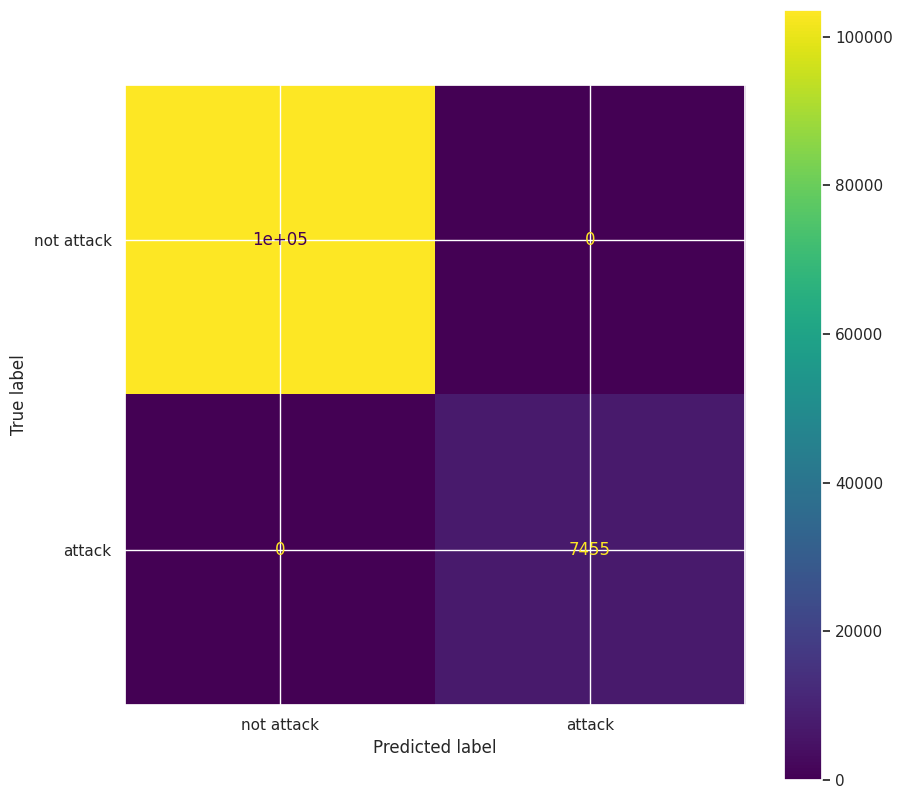

In [ ]:
# Assuming you have already calculated the confusion matrix 'mat' and defined the labels
mat=confusion_matrix(y_test,y_pred)
label = ['not attack', 'attack']

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 10))

# Create the ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(mat, display_labels=label)

# Plot the confusion matrix
dis.plot(ax=ax)

# Show the plot
plt.show()

**SVM** **ALGORITHM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
sv=SVC()
sv.fit(x_train,y_train)
y_pred1=sv.predict(x_test)
print('Accuracy score of dataset using svm',accuracy_score(y_test,y_pred1))
print('confusion matrix of dataset using svm',confusion_matrix(y_test,y_pred1))
print(classification_report(y_pred1,y_test))


SVC()

Accuracy score of dataset using svm 0.9328717043653653
confusion matrix of dataset using svm [[103601      0]
 [  7455      0]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    111056
           1       0.00      0.00      0.00         0

    accuracy                           0.93    111056
   macro avg       0.50      0.47      0.48    111056
weighted avg       1.00      0.93      0.97    111056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


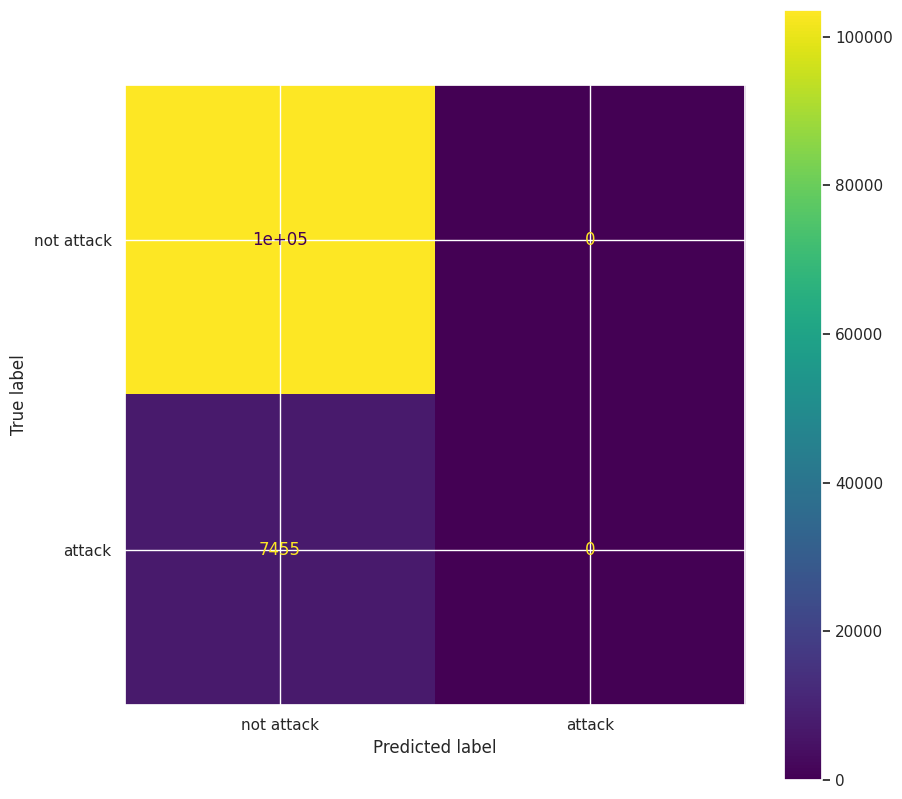

In [ ]:
mat=confusion_matrix(y_test,y_pred1)
# Assuming you have already calculated the confusion matrix 'mat' and defined the labels
label = ['not attack', 'attack']

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 10))

# Create the ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(mat, display_labels=label)

# Plot the confusion matrix
dis.plot(ax=ax)

# Show the plot
plt.show()
